# Implementation of linear Regression for multiple fetures using matrix

### Import All the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read training csv fles using pandas

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()



,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


### Convert the dataframe into numpy array

In [4]:
X = df.values

In [5]:
Y = X[:,5]   # check your training file and divide the features and prediction acc.

In [6]:
X = X[:,:-1]



### We are  using matix for implementation of this algorithm so when we obtain weight we also get bais with it so that we can reduce time complexity


In [7]:
one = np.ones((X.shape[0],1))  ### we add one in front of our training data 
X = np.hstack((one,X))
print(X)

[[ 1.          0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [ 1.         -0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 1.          0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.          1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [ 1.         -1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [ 1.         -1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


In [8]:
print(Y.shape,X.shape)

(1600,) (1600, 6)


### Normalization of Data

In [9]:
u = X.mean()
std = X.std()
X = (X-u)/std

In [10]:
def acc(y_,y): ## finds the accuracy of predicted data using R2 score method 
    s = np.sum((y-y_)**2)
    k = np.sum((y-np.mean(y))**2)
    return 1-(s/k)
def pred(x,theta):  ### makes prediction 
    return np.dot(x,theta)
def error(x,y,theta):  ### used to find error
    e = 0.0
    m = x.shape[0]
    y_ = pred(x,theta)
    e = np.sum((y_ - y)**2)
    return e/m
def grad(x,y,theta): ### used to find the gradient 
    m,n = x.shape
    g = np.zeros((n,))
    y_ = pred(x,theta)
    g = np.dot(x.T,(y_-y))
    return g/m
def grad_des(x,y,l=0.1,max=500): ### used to find final parameters learned from training data and error_list
    n = x.shape[1]
    theta = np.zeros((n,))
    er = []
    for i in range(max):
        ei = error(x,y,theta)
        er.append(ei)
        g = grad(x,y,theta)
        theta = theta - l*g
    return theta,er

In [11]:
### Lets train our Data

In [12]:
theta,e = grad_des(X,Y)

In [13]:
print(theta) ## these are the parameter learned by us it include bias also

[37.09046246 29.48547523 92.04935807  8.22583053 44.47152069  2.50249268]


## Lets plot error list

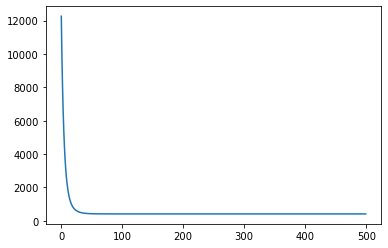

In [14]:
plt.plot(e)
plt.show()


### Time to make some predictions 


In [15]:
x = pd.read_csv('Test.csv')  ## read your  test csv file using pandas

In [16]:
x = x.values  ## convert it to numpy array


In [17]:
o = np.ones((x.shape[0],1))  ### we will modify our data by adding one  to it
x = np.hstack((o,x))
print(x.shape)



(400, 6)


### Final Prediction

In [18]:
y = pred(x,theta)

In [19]:
print(y)

[ 1.45958043e+02  1.49364479e+02  1.05365131e+01 -1.15136620e+01
 -6.31477392e+01 -1.20804124e+01 -4.29340057e+01  5.57957397e+01
  2.04817588e+02  2.03838118e+02 -7.25723771e+01  1.14681367e+01
  2.82451744e+01  1.54317857e+02  7.21736986e+01  7.75429009e+01
 -1.56241257e+02  5.45954445e+01  4.36965415e+01  1.67572528e+02
  9.66192435e+01 -2.94458100e+01 -7.53462682e+01  2.47694358e+01
 -2.60041981e+01  4.39428314e+01  6.11767029e+01  1.39107562e+02
  5.61196034e+01  6.20023636e+00  1.42366353e+02 -1.24502348e+01
  2.47497959e+02  1.83636257e+01 -1.94958065e+02  1.86003641e+02
  2.99214132e+01  4.47713694e+01 -2.74135377e+02  1.08733059e+02
 -4.85380701e+01 -1.73133178e+02 -2.05050540e+02  1.65998236e+02
 -4.11309671e+01  1.36898400e+02  2.85655291e+01  5.26005704e+01
 -6.52376557e+01  4.79768555e+00  4.28768540e+01 -1.41176642e+02
  9.68571554e+01 -6.50267098e+01 -7.33169612e+01 -1.22777836e+02
  9.42548402e+01  1.40042745e+02 -4.19841488e+01  7.35959789e+01
  7.30840491e+01 -1.83356

## Convert our numpy array to data frame 

In [20]:
yi = pd.DataFrame(data = y ,columns = ["target"] )  

In [21]:
yi.head()

,target
0,145.958043
1,149.364479
2,10.536513
3,-11.513662
4,-63.147739


## Create a result.csv file to save the dataframe in it 

In [22]:
yi.to_csv('result.csv',index = True)